<a href="https://colab.research.google.com/github/MuleHakim/Harmony-Search/blob/main/HarmonySearch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Harmony Search Implementation**


> Harmony Search (HS) is a metaheuristic optimization algorithm inspired by the improvisation process of musicians seeking a perfect state of harmony. Developed by Z. W. Geem et al. in 2001, HS has gained popularity for solving various optimization problems. It draws parallels between the harmony in music and optimality in problem-solving processes. This algorithm has found applications in diverse fields such as function optimization, water distribution networks, structural design, and vehicle routing.


> In this implementation, we have employed the Harmony Search algorithm as a versatile optimization tool, catering to both
 >  1.   **general-purpose scenarios**
 >  2.   **specific application in optimizing the Rosenbrock's Banana function**.

> The general-purpose implementation allows users to provide any objective function for minimization, offering flexibility in tackling diverse optimization challenges. Simultaneously, the specialization for the Rosenbrock's function showcases the algorithm's efficacy in addressing specific optimization tasks.

> By utilizing a harmony memory and iteratively refining solutions through a combination of randomization, pitch adjustment, and acceptance criteria, the Harmony Search algorithm demonstrates its adaptability and effectiveness in finding optimal solutions across various optimization landscapes, exemplified through the specific lens of the Rosenbrock's function.




# 1. General-purpose Harmony Search optimization algorithm

It's designed to optimize any given objective function. It uses a modular structure with functions for initializing harmony memory, generating new harmonies, updating the harmony memory, and performing the harmony search

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


> **Objective Function (objective_function)**:
> This function defines the objective that the Harmony Search algorithm is trying to minimize. In this case, it's the sum of squared values of the input vector.

In [ ]:
def objective_function(x):
    """Objective function to be minimized."""
    return sum(x**2)




> **Initialization of Harmony Memory (initialize_harmony_memory)**:
> This function generates an initial set of harmonies with random values within specified bounds. The harmony memory is a collection of potential solutions.



In [ ]:
def initialize_harmony_memory(hm_size, num_variables, lower_bound, upper_bound):
    """Initialize harmony memory with random values within bounds."""
    return np.random.uniform(lower_bound, upper_bound, (hm_size, num_variables))




>**Improvise New Harmony (improvise_new_harmony)**:
> This function generates a new harmony by either selecting a value from an existing harmony (with a certain probability defined by bandwidth) or introducing randomness within the variable bounds.



In [ ]:
def improvise_new_harmony(harmony_memory, bandwidth, lower_bound, upper_bound):
    """Generate a new harmony by combining existing harmonies or introducing randomness."""
    new_harmony = np.zeros_like(harmony_memory[0])

    for i in range(len(new_harmony)):
        if np.random.rand() < bandwidth:
            new_harmony[i] = harmony_memory[np.random.randint(len(harmony_memory)), i]
        else:
            new_harmony[i] = np.random.uniform(lower_bound[i], upper_bound[i])

    return new_harmony


> **Update Harmony Memory (update_harmony_memory)**:
> This function updates the harmony memory if the newly generated harmony has a better fitness value than the worst harmony in the current memory.

In [ ]:
def update_harmony_memory(harmony_memory, harmony_memory_fitness, new_harmony, new_harmony_fitness):
    """Update harmony memory if the new harmony is better than the worst harmony."""
    worst_index = np.argmax(harmony_memory_fitness)
    if new_harmony_fitness < harmony_memory_fitness[worst_index]:
        harmony_memory[worst_index] = new_harmony
        harmony_memory_fitness[worst_index] = new_harmony_fitness



> **Harmony Search Algorithm (harmony_search)**:
> This is the main function that implements the Harmony Search algorithm. It iteratively generates new harmonies, updates the harmony memory, and records the best fitness values over iterations.

In [ ]:
def harmony_search(num_iterations, hm_size, num_variables, lower_bound, upper_bound, bandwidth):
    """Perform the Harmony Search optimization algorithm."""
    print("It may take a few minutes ...")
    harmony_memory = initialize_harmony_memory(hm_size, num_variables, lower_bound, upper_bound)
    harmony_memory_fitness = np.array([objective_function(h) for h in harmony_memory])

    # Store the best fitness at each iteration for visualization
    best_fitness_history = []

    for iteration in range(num_iterations):
        new_harmony = improvise_new_harmony(harmony_memory, bandwidth, lower_bound, upper_bound)
        new_harmony_fitness = objective_function(new_harmony)

        update_harmony_memory(harmony_memory, harmony_memory_fitness, new_harmony, new_harmony_fitness)

        best_fitness_history.append(min(harmony_memory_fitness))

    best_solution = harmony_memory[np.argmin(harmony_memory_fitness)]
    return best_solution, objective_function(best_solution), best_fitness_history, harmony_memory, harmony_memory_fitness


> **Plot Convergence (plot_convergence)**:
> This function visualizes the convergence of the algorithm by plotting the best fitness values over iterations.

In [ ]:
def plot_convergence(best_fitness_history):
    """Plot the convergence of Harmony Search algorithm."""
    plt.figure(figsize=(8, 6))
    plt.plot(range(1, len(best_fitness_history) + 1), best_fitness_history, marker='o')
    plt.title("Harmony Search Convergence")
    plt.xlabel("Iteration")
    plt.ylabel("Best Fitness Value")
    plt.grid(True)
    plt.show()


> **Plot Harmony Memory Evolution (plot_harmony_memory_evolution)**:
> This function visualizes how the values of each variable in the harmony memory evolve over iterations.

In [ ]:
def plot_harmony_memory_evolution(harmony_memory):
    """Plot the evolution of Harmony Memory variables over iterations."""
    plt.figure(figsize=(10, 8))
    for i in range(harmony_memory.shape[1]):
        plt.plot(range(1, len(harmony_memory) + 1), harmony_memory[:, i], label=f'Variable {i + 1}')

    plt.title("Harmony Memory Evolution")
    plt.xlabel("Iteration")
    plt.ylabel("Variable Value")
    plt.legend()
    plt.grid(True)
    plt.show()


> **Plot Harmony Memory Fitness (plot_harmony_memory_fitness)**:
> This function visualizes the fitness values of the harmony memory over iterations.

In [ ]:
def plot_harmony_memory_fitness(harmony_memory_fitness):
    """Plot the fitness values of Harmony Memory over iterations."""
    plt.figure(figsize=(8, 6))
    plt.plot(range(1, len(harmony_memory_fitness) + 1), harmony_memory_fitness, marker='o', color='orange')
    plt.title("Harmony Memory Fitness")
    plt.xlabel("Iteration")
    plt.ylabel("Fitness Value")
    plt.grid(True)
    plt.show()


In [ ]:

# Example usage with individual visualizations
num_iterations = 2000
hm_size = 10
num_variables = 5
lower_bound = [-5, -5, -5, -5, -5]
upper_bound = [5, 5, 5, 5, 5]
bandwidth = 0.5

best_solution, best_fitness, best_fitness_history, final_harmony_memory, final_harmony_fitness = harmony_search(
    num_iterations, hm_size, num_variables, lower_bound, upper_bound, bandwidth
)

print("Best solution:", best_solution)
print("Best fitness:", best_fitness)


It may take a few minutes ...
Best solution: [-0.14492616  0.07830783 -0.15553283 -0.11624444  0.04700108]
Best fitness: 0.0670480392814569


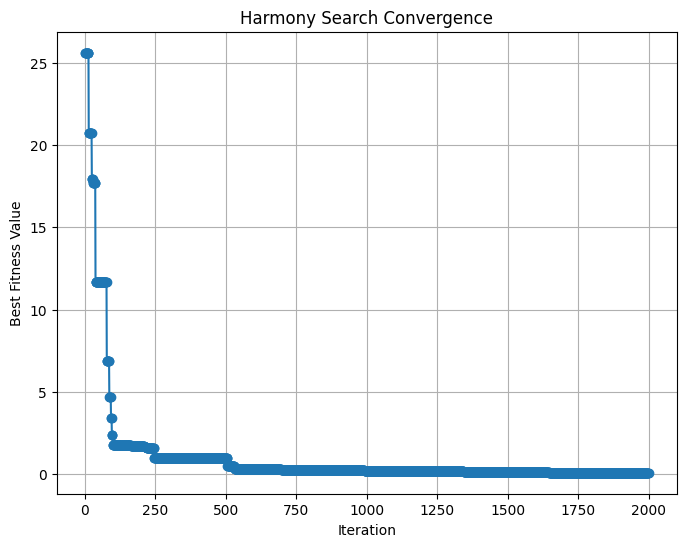

In [ ]:
# Individual visualizations
plot_convergence(best_fitness_history)

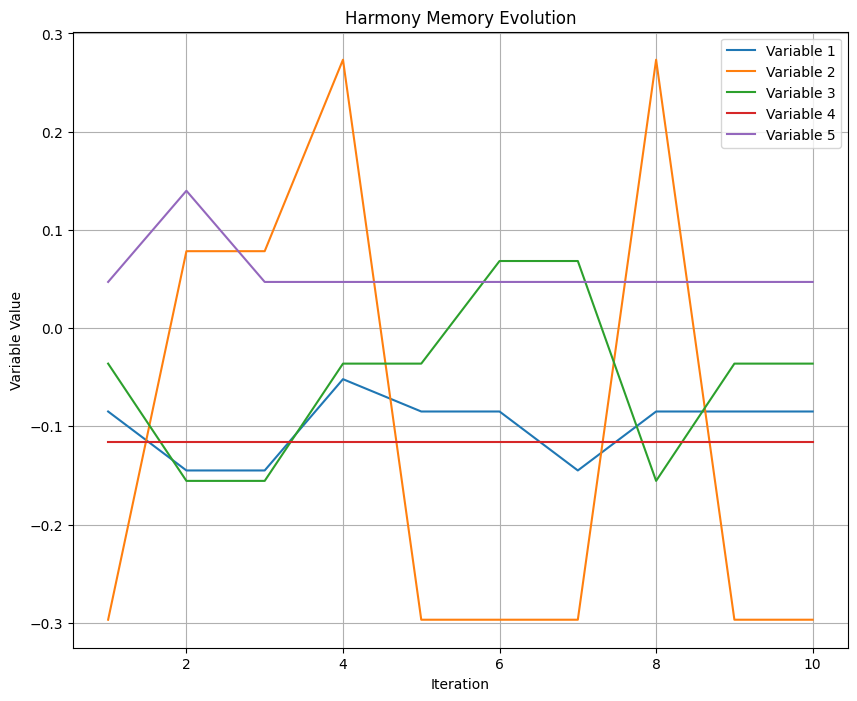

In [ ]:
plot_harmony_memory_evolution(final_harmony_memory)

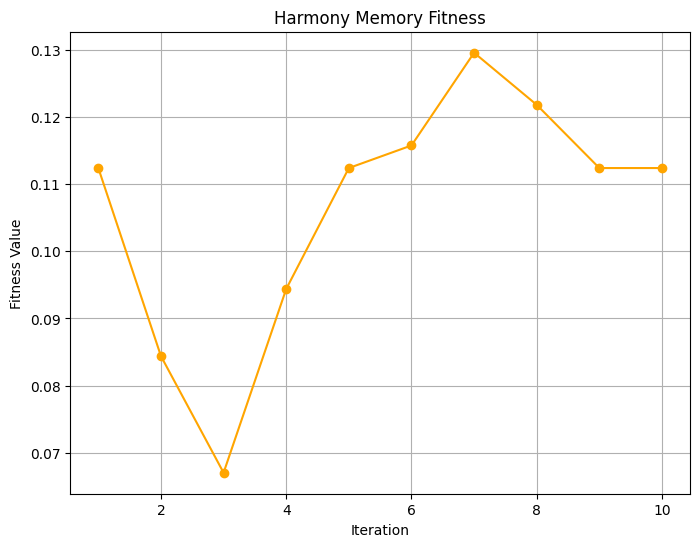

In [ ]:
plot_harmony_memory_fitness(final_harmony_fitness)


In [ ]:
print("Final Harmony Memory:")
print(final_harmony_memory)


Final Harmony Memory:
[[-0.08489875 -0.29687033 -0.03615434 -0.11624444  0.04700108]
 [-0.14492616  0.07830783 -0.15553283 -0.11624444  0.13983444]
 [-0.14492616  0.07830783 -0.15553283 -0.11624444  0.04700108]
 [-0.05198218  0.27322176 -0.03615434 -0.11624444  0.04700108]
 [-0.08489875 -0.29687033 -0.03615434 -0.11624444  0.04700108]
 [-0.08489875 -0.29687033  0.06830266 -0.11624444  0.04700108]
 [-0.14492616 -0.29687033  0.06830266 -0.11624444  0.04700108]
 [-0.08489875  0.27322176 -0.15553283 -0.11624444  0.04700108]
 [-0.08489875 -0.29687033 -0.03615434 -0.11624444  0.04700108]
 [-0.08489875 -0.29687033 -0.03615434 -0.11624444  0.04700108]]


In [ ]:
print("Fitness of Final Harmony Memory:")
print(final_harmony_fitness)

Fitness of Final Harmony Memory:
[0.1123688  0.08439261 0.06704804 0.09438128 0.1123688  0.11572691
 0.12952271 0.12177026 0.1123688  0.1123688 ]


This implementation is flexible and can be applied to a wide range of optimization problems by defining an appropriate objective function.



---
---


# 2. **Implementation for Specific predefined optimazation**

## **Optimize Rosenbrock's Banana function**

> The implementation includes a function hs_simple that takes the function to be optimized and the maximum number of attempts as input

> The following implementation is specifically designed for solving a predefined optimization problem using Harmony Search. It optimizes Rosenbrock's Banana function.

In [ ]:
def harmony_rosenbrock(fun, max_attempt=25000):
    print("It may take a few minutes ...")

    if not callable(fun):
        # If the provided function is not callable, use a default function (Rosenbrock's Banana function)
        def fun(x):
            return (1 - x[0]) ** 2 + 100 * (x[1] - x[0] ** 2) ** 2

    ndim = 2
    range_limits = np.array([[-10, 10], [-10, 10]])
    pa_range = np.array([200, 200])

    HS_size = 20
    HM_accept_rate = 0.95
    PA_rate = 0.7

    # Initialize Harmony Memory
    HM = np.random.uniform(range_limits[:, 0], range_limits[:, 1], size=(HS_size, ndim))
    HM_best = np.array([fun(x) for x in HM])

    # Harmony Search
    for count in range(1, max_attempt + 1):
        for j in range(ndim):
            if np.random.rand() < HM_accept_rate:
                if np.random.rand() <= PA_rate:
                    # Pitch Adjusting
                    pa = (range_limits[j, 1] - range_limits[j, 0]) / pa_range[j]
                    HM[:, j] = HM[:, j] + pa * (np.random.rand(HS_size) - 0.5)
                else:
                    # Harmony Memory Accepting Rate
                    HM[:, j] = HM[np.random.randint(HS_size, size=HS_size), j]
            else:
                # New Search via Randomization
                HM[:, j] = np.random.uniform(range_limits[j, 0], range_limits[j, 1], size=HS_size)

        # Evaluate the new solutions
        f_best = fun(HM[0])
        HS_max_num = 0
        HS_min_num = 0
        HS_max = HM_best[0]
        HS_min = HM_best[0]

        for i in range(1, HS_size):
            f_i = fun(HM[i])
            if f_i > HS_max:
                HS_max_num = i
                HS_max = f_i
            if f_i < HS_min:
                HS_min_num = i
                HS_min = f_i

        # Update the current solution if better
        if f_best > HS_max:
            HM[HS_max_num] = HM[0]
            HM_best[HS_max_num] = f_best

    # Find the best solution in Harmony Memory
    best_index = np.argmin(HM_best)
    best_solution = HM[best_index]

    return best_solution, fun(best_solution)



In [ ]:

# Example usage
best_solution, best_fitness = harmony_rosenbrock(None, 20000)
print("Best solution:", best_solution)
print("Best fitness:", best_fitness)

It may take a few minutes ...
Best solution: [1.36068254 6.28212887]
Best fitness: 1963.2154479288938


> This implementation is more specialized and may be easier to use for someone who just wants to apply the Harmony Search algorithm to a specific problem without dealing with the modular structure.

> This code implements the Harmony Search algorithm specifically for the Rosenbrock's Banana function, optimizing it in a two-dimensional space. The algorithm iteratively refines a Harmony Memory by generating new solutions and updating based on the acceptance criteria. The final result is the best solution found during the iterations.



---
---


## Conclusion

> Harmony Search stands out as a versatile optimization algorithm, finding applications across various domains. Its ability to strike a balance between exploitation and exploration, inspired by musical harmony, makes it a valuable tool for solving complex optimization problems. As with any metaheuristic, parameter tuning and problem-specific adaptations are crucial for achieving optimal results. The presented example showcases the algorithm's effectiveness in finding the optimal solution for a simple mathematical problem, highlighting its potential for broader application.

> We provided two implementations of Harmony Search in Python. The first one is a modular and flexible version that can be applied to a variety of optimization problems. It consists of separate functions for initializing harmony memory, generating new harmonies, updating the memory, and performing the harmony search. The second implementation is a specialized version designed specifically for optimizing Rosenbrock's Banana function. It encapsulates the entire process within a single function, making it more user-friendly for solving a predefined problem.

> In conclusion, Harmony Search provides a harmonious blend of inspiration from music and optimization, offering a unique approach to solving complex problems. Its simplicity, coupled with robust performance, makes it a valuable addition to the toolkit of optimization practitioners. Further research and exploration of Harmony Search in diverse problem domains promise to reveal new dimensions of its capabilities.



---



---



# **Thank you**